In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/Kamil128/ProjektPraktycznyRegresja/main/data/medical_cost/medical_cost.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [53]:
df[['sex', 'smoker', 'region']].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


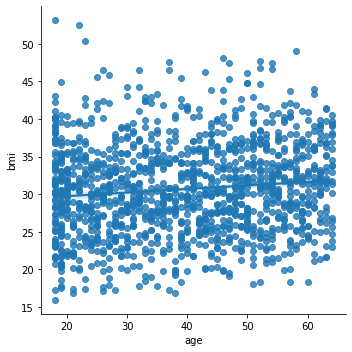

In [14]:
sns.lmplot(x='age', y='bmi', data=df)

<AxesSubplot:>

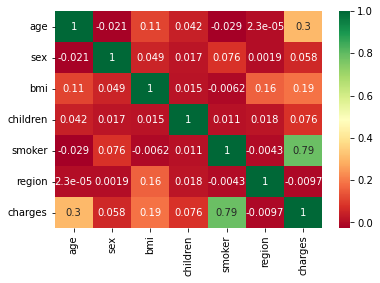

In [50]:
#liczenie korelacji między zmiennymi
count_corr=df_copy.corr()

#heatmapa
sns.heatmap(count_corr, cmap= 'RdYlGn',annot=True)

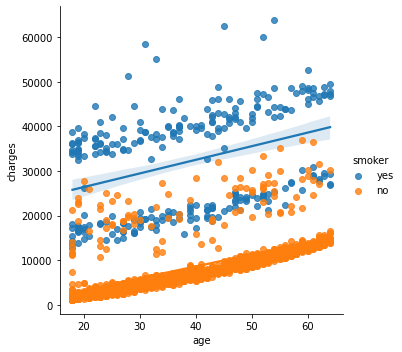

In [51]:
sns.lmplot(x='age', y='charges', data=df, hue='smoker')


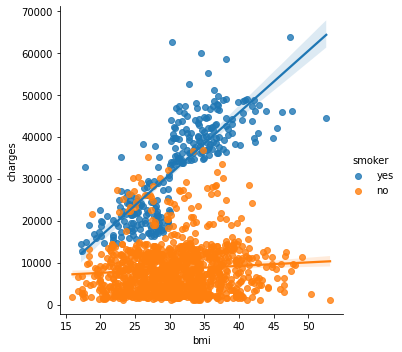

In [52]:
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker')


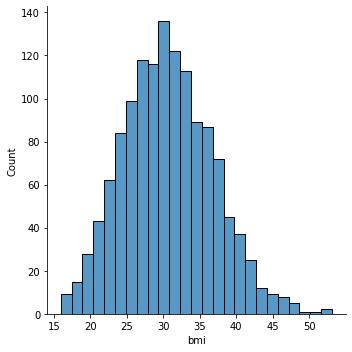

In [56]:
sns.displot(df.bmi)

<AxesSubplot:xlabel='sex', ylabel='charges'>

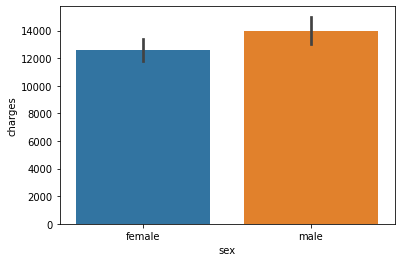

In [57]:
sns.barplot(x='sex', y='charges', data=df)

In [46]:
df = df.drop_duplicates()

df_copy = df.copy()
ordinal_encoder = OrdinalEncoder()
df_copy[['sex', 'smoker', 'region']] = ordinal_encoder.fit_transform(df_copy[['sex', 'smoker', 'region']])

df_copy = df_copy[df_copy['charges'] < 50000]
df_copy[["age", "children"]] = df_copy[["age", "children"]].astype(float)
# DLACZEGO ZAOKRĄGLENIE???
df_copy.bmi = df_copy.bmi.round(2)
df_copy.charges = df_copy.charges.round(2)

In [47]:
X = df_copy.iloc[:, :-1].values
y = df_copy['charges'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [58]:
#regresja liniowa
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

MSE_lr_train = mean_squared_error(y_train, y_train_pred)
MSE_lr_test = mean_squared_error(y_test, y_test_pred)
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, y_test_pred)


In [59]:
#drzewo decyzyjne
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

MSE_t_train = mean_squared_error(y_train, y_train_pred)
MSE_t_test = mean_squared_error(y_test, y_test_pred)
r2_t_train = r2_score(y_train, y_train_pred)
r2_t_test = r2_score(y_test, y_test_pred)



In [61]:
#Wyniki  modeli
wyniki = pd.DataFrame({'MSE train':[MSE_lr_train.round(0), MSE_t_train.round(0)],
                      'MSE test':[MSE_lr_test.round(0), MSE_t_test.round(0)],
                      'R^2 train':[r2_lr_train, r2_t_train],
                      'R^2 test':[r2_lr_test, r2_t_test]})
wyniki.index=['Linear Regression', 'Decision Tree']
wyniki

,MSE train,MSE test,R^2 train,R^2 test
Linear Regression,33864002.0,34050795.0,0.750217,0.759014
Decision Tree,17811366.0,22435679.0,0.868622,0.841217


In [63]:
X = df_copy[['age', 'bmi', 'smoker']].values
y = df_copy['charges'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [64]:
#regresja liniowa
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

MSE_lr_train = mean_squared_error(y_train, y_train_pred)
MSE_lr_test = mean_squared_error(y_test, y_test_pred)
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, y_test_pred)

In [72]:
#drzewo decyzyjne
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

MSE_t_train = mean_squared_error(y_train, y_train_pred)
MSE_t_test = mean_squared_error(y_test, y_test_pred)
r2_t_train = r2_score(y_train, y_train_pred)
r2_t_test = r2_score(y_test, y_test_pred)

In [73]:
#Wyniki  modeli
wyniki = pd.DataFrame({'MSE train':[MSE_lr_train.round(0), MSE_t_train.round(0)],
                      'MSE test':[MSE_lr_test.round(0), MSE_t_test.round(0)],
                      'R^2 train':[r2_lr_train, r2_t_train],
                      'R^2 test':[r2_lr_test, r2_t_test]})
wyniki.index=['Linear Regression', 'Decision Tree']
wyniki

,MSE train,MSE test,R^2 train,R^2 test
Linear Regression,34275195.0,34884443.0,0.747184,0.753114
Decision Tree,18284186.0,21756702.0,0.865135,0.846023


In [85]:
X = df_copy[['smoker']].values
y = df_copy['charges'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [86]:
#regresja liniowa
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

MSE_lr_train = mean_squared_error(y_train, y_train_pred)
MSE_lr_test = mean_squared_error(y_test, y_test_pred)
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, y_test_pred)

In [87]:
#Wyniki  modeli
wyniki = pd.DataFrame({'MSE train':[MSE_lr_train.round(0)],
                      'MSE test':[MSE_lr_test.round(0)],
                      'R^2 train':[r2_lr_train],
                      'R^2 test':[r2_lr_test]})
wyniki.index=['Linear Regression']
wyniki

,MSE train,MSE test,R^2 train,R^2 test
Linear Regression,51237700.0,57001504.0,0.622068,0.596587


In [99]:
from sklearn.model_selection import KFold
X = df_copy[["age","bmi", "smoker"]]
y = df_copy["charges"]
cv = KFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv.split(X, y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]

#regresja liniowa
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

MSE_lr_train = mean_squared_error(y_train, y_train_pred)
MSE_lr_test = mean_squared_error(y_test, y_test_pred)
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, y_test_pred)

#drzewo decyzyjne
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

MSE_t_train = mean_squared_error(y_train, y_train_pred)
MSE_t_test = mean_squared_error(y_test, y_test_pred)
r2_t_train = r2_score(y_train, y_train_pred)
r2_t_test = r2_score(y_test, y_test_pred)

In [100]:
#Wyniki  modeli
wyniki = pd.DataFrame({'MSE train':[MSE_lr_train.round(0), MSE_t_train.round(0)],
                      'MSE test':[MSE_lr_test.round(0), MSE_t_test.round(0)],
                      'R^2 train':[r2_lr_train, r2_t_train],
                      'R^2 test':[r2_lr_test, r2_t_test]})
wyniki.index=['Linear Regression', 'Decision Tree']
wyniki

,MSE train,MSE test,R^2 train,R^2 test
Linear Regression,34317542.0,34863404.0,0.752447,0.730443
Decision Tree,18419322.0,19441113.0,0.867131,0.849685
